# Data pre-processing

Import packages

In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter
from itertools import chain
from copy import deepcopy
%matplotlib inline

In [2]:
# set the base directory
base_dir = Path(os.path.abspath('')).parent
os.chdir(base_dir)
print("base directory:", base_dir)

base directory: c:\Users\jespe\Documents\GitHub_local\ARFusion


## NCBI

In [3]:
NCBI_data = pd.read_csv('data/raw/NCBI.tsv', sep='\t', low_memory=False)
print("NCBI data shape:", NCBI_data.shape)
print(f"NCBI number of samples: {NCBI_data.shape[0]:,}")

NCBI data shape: (340922, 66)
NCBI number of samples: 340,922


In [4]:
print("NCBI data columns:", NCBI_data.columns)

NCBI data columns: Index(['#label', 'FDA_lab_id', 'HHS_region', 'IFSAC_category', 'LibraryLayout',
       'PFGE_PrimaryEnzyme_pattern', 'PFGE_SecondaryEnzyme_pattern',
       'Platform', 'Run', 'asm_acc', 'asm_level', 'asm_stats_contig_n50',
       'asm_stats_length_bp', 'asm_stats_n_contig', 'assembly_method',
       'attribute_package', 'bioproject_acc', 'bioproject_center',
       'biosample_acc', 'isolate_identifiers', 'collected_by',
       'collection_date', 'epi_type', 'fullasm_id', 'geo_loc_name', 'host',
       'host_disease', 'isolation_source', 'lat_lon', 'ontological_term',
       'outbreak', 'sample_name', 'scientific_name', 'serovar', 'source_type',
       'species_taxid', 'sra_center', 'sra_release_date', 'strain',
       'sequenced_by', 'project_name', 'target_acc', 'target_creation_date',
       'taxid', 'wgs_acc_prefix', 'wgs_master_acc', 'minsame', 'mindiff',
       'computed_types', 'number_drugs_resistant', 'number_drugs_intermediate',
       'number_drugs_suscepti

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
NCBI_data.head()

,#label,FDA_lab_id,HHS_region,IFSAC_category,LibraryLayout,PFGE_PrimaryEnzyme_pattern,PFGE_SecondaryEnzyme_pattern,Platform,Run,asm_acc,asm_level,asm_stats_contig_n50,asm_stats_length_bp,asm_stats_n_contig,assembly_method,attribute_package,bioproject_acc,bioproject_center,biosample_acc,isolate_identifiers,collected_by,collection_date,epi_type,fullasm_id,geo_loc_name,host,host_disease,isolation_source,lat_lon,ontological_term,outbreak,sample_name,scientific_name,serovar,source_type,species_taxid,sra_center,sra_release_date,strain,sequenced_by,project_name,target_acc,target_creation_date,taxid,wgs_acc_prefix,wgs_master_acc,minsame,mindiff,computed_types,number_drugs_resistant,number_drugs_intermediate,number_drugs_susceptible,number_drugs_tested,number_amr_genes,number_core_amr_genes,AST_phenotypes,AMR_genotypes,AMR_genotypes_core,number_stress_genes,stress_genotypes,number_virulence_genes,virulence_genotypes,amrfinder_version,refgene_db_version,amrfinder_analysis_type,amrfinder_applied
0,PDT000002365.3|SAMN02368173|GCA_012802165.1|Escherichia coli||ESC0165|Pathogen: clinical or host-associated,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060511,GCA_012802165.1,Contig,134039,4718827,88,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368173,"BCW_2912,""CFSAN005754"",""ESC0165"",""SRS519863""",FDA,NaN,clinical,19221148.0,USA,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2912,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0165,NaN,NaN,PDT000002365.3,2015-09-14,562,DABDQO,DABDQO000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,2,"emrE,ymgB",3,"astA,espX1=PARTIAL,fdeC",3.6.7,2020-03-20.1,COMBINED,1
1,PDT000002366.3|SAMN02368174|GCA_012802195.1|Escherichia coli||ESC0167|Pathogen: environmental/food/other,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060510,GCA_012802195.1,Contig,73843,4931067,157,SKESA v. 2.2,Pathogen: environmental/food/other,PRJNA203445,University of California at Davis,SAMN02368174,"BCW_2914,""CFSAN005756"",""ESC0167"",""SRS519864""",FDA,NaN,environmental/other,19221188.0,USA,NaN,NaN,dog,NaN,NaN,NaN,BCW_2914,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0167,NaN,NaN,PDT000002366.3,2015-09-14,562,DABDQN,DABDQN000000000.1,NaN,NaN,NaN,0,0,0,0,6,3,NaN,"aadA1,acrF,blaEC,mdtM,sul1,tet(A)","aadA1,sul1,tet(A)",9,"merA=HMM,merC,merD=HMM,merE=HMM,merP,merR,merT,qacEdelta1,ymgB",1,espX1=PARTIAL,3.6.7,2020-03-20.1,COMBINED,1
2,PDT000002367.3|SAMN02368180|GCA_012802235.1|Escherichia coli||ESC0176|Pathogen: clinical or host-associated,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060509,GCA_012802235.1,Contig,81293,5045269,220,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368180,"BCW_2923,""CFSAN005765"",""ESC0176"",""SRS519865""",FDA,NaN,clinical,19221208.0,Sweden,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2923,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0176,NaN,NaN,PDT000002367.3,2015-09-14,562,DABDQR,DABDQR000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,2,"emrE,ymgB",5,"espX1=PARTIAL,fdeC,iha,mchB,mchF",3.6.7,2020-03-20.1,COMBINED,1
3,PDT000002368.3|SAMN02368181|GCA_012802275.1|Escherichia coli||ESC0178|Pathogen: clinical or host-associated,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060508,GCA_012802275.1,Contig,85880,4922402,145,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368181,"BCW_2925,""CFSAN005767"",""ESC0178"",""SRS519866""",FDA,NaN,clinical,19221248.0,Sweden,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2925,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0178,NaN,NaN,PDT000002368.3,2015-09-14,562,DABDQQ,DABDQQ000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,25,"emrE,hdeD-GI,hsp20,kefB-GI,pcoA,pcoB,pcoC,pcoD,pcoE,pcoR,pcoS,psi-GI,shsP,silA,silB,silC,silE,silF,silP,silR,silS,trxLHR,yfdX1,yfdX2,ymgB",2,"fdeC,sslE=HMM",3.6.7,2020-03-20.1,COMBINED,1
4,PDT000002369.3|SAMN02368184|GCA_012802315.1|Escherichia coli||ESC0182|Pathogen:

### Some data exploration

In [6]:
explore_columns = ['collection_date', 'geo_loc_name', 'host', 'scientific_name',
                   'AST_phenotypes', 'AMR_genotypes_core', 'AMR_genotypes',] 

df_explore = NCBI_data[explore_columns]
df_explore.head()

,collection_date,geo_loc_name,host,scientific_name,AST_phenotypes,AMR_genotypes_core,AMR_genotypes
0,NaN,USA,Homo sapiens,Escherichia coli,NaN,NaN,"acrF,blaEC,mdtM"
1,NaN,USA,NaN,Escherichia coli,NaN,"aadA1,sul1,tet(A)","aadA1,acrF,blaEC,mdtM,sul1,tet(A)"
2,NaN,Sweden,Homo sapiens,Escherichia coli,NaN,NaN,"acrF,blaEC,mdtM"
3,NaN,Sweden,Homo sapiens,Escherichia coli,NaN,NaN,"acrF,blaEC,mdtM"
4,NaN,USA:WA,NaN,Escherichia coli,NaN,"aph(3'')-Ib,aph(6)-Id,sul2,tet(A)","acrF,aph(3'')-Ib,aph(6)-Id,blaEC,mdtM,sul2,tet(A)"


In [7]:
print("Basic information about the data:")
num_samples = df_explore.shape[0]
num_pheno = df_explore['AST_phenotypes'].count()
num_genotype = df_explore['AMR_genotypes_core'].count()

print(f"Number of samples: {num_samples:,}")
print(f"Number of samples with phenotype info: {num_pheno:,} ({num_pheno/num_samples:.2%})")
print(f"Number of samples with genotype info: {num_genotype:,} ({num_genotype/num_samples:.2%})")

df_overlap = df_explore[df_explore['AMR_genotypes_core'].notnull() & df_explore['AST_phenotypes'].notnull()]
num_overlap_samples = df_overlap.shape[0]
print(f"Number of samples with both phenotype and genotype info: {num_overlap_samples:,}\
 ({num_overlap_samples/num_samples:.2%})")

df_neither = df_explore[df_explore['AMR_genotypes_core'].isnull() & df_explore['AST_phenotypes'].isnull()]
num_neither_samples = df_neither.shape[0]
print(f"Number of samples with neither phenotype nor genotype info: {num_neither_samples:,}\
 ({num_neither_samples/num_samples:.2%})")

Basic information about the data:
Number of samples: 340,922
Number of samples with phenotype info: 6,642 (1.95%)
Number of samples with genotype info: 280,966 (82.41%)
Number of samples with both phenotype and genotype info: 5,678 (1.67%)
Number of samples with neither phenotype nor genotype info: 58,992 (17.30%)


Explore the genotype data

#### Isolate genotype data for parsing  
Note: This keeps the index of the orginal dataset

In [8]:
dataset_columns = ['collection_date', 'geo_loc_name', 'AMR_genotypes_core']
df_geno = df_explore[df_explore['AMR_genotypes_core'].notnull()]
num_geno_samples = df_geno.shape[0]
print(f"Number of samples with genotype info: {num_geno_samples:,} ({num_geno_samples/num_samples:.2%})")
df_geno = df_geno[dataset_columns]
df_geno.head()

Number of samples with genotype info: 280,966 (82.41%)


,collection_date,geo_loc_name,AMR_genotypes_core
1,NaN,USA,"aadA1,sul1,tet(A)"
4,NaN,USA:WA,"aph(3'')-Ib,aph(6)-Id,sul2,tet(A)"
6,NaN,Sweden,"cyaA_S352T=POINT,uhpT_E350Q=POINT"
8,NaN,USA:WA,parE_D475E=POINT
9,NaN,USA:WA,uhpT_E350Q=POINT


**Geo_loc_name**

*not determined*, *not collected*, *not provided*, *Not Provided* -> *NaN*

In [9]:
# set column as string type
alternative_nan = ['not determined', 'not collected', 'not provided', 'Not Provided',
                   'OUTPATIENT', 'Not collected', 'Not Collected', 'not available']
df_geno.loc[:,'geo_loc_name'] = df_geno['geo_loc_name'].replace(alternative_nan, np.nan) 
# df_geno['geo_loc_name'].fillna('unknown', inplace=True) # replace NaN with 'unknown', Note: won't function as NaN

Remove regional info, after : (colon) or , (comma)

In [10]:
df_geno.loc[:,'geo_loc_name'] = df_geno['geo_loc_name'].str.split(',').str[0]
df_geno.loc[:,'geo_loc_name'] = df_geno['geo_loc_name'].str.split(':').str[0] 
df_geno.rename(columns={'geo_loc_name': 'country'}, inplace=True)
df_geno.replace('United Kingdom', 'UK', inplace=True)

Check distribution of countries, if they constitute more than 0.05% of total samples

Number of unique countries: 153
Number of countries with frequency > 0.5%: 18
Share of unknown samples: (21.09%)


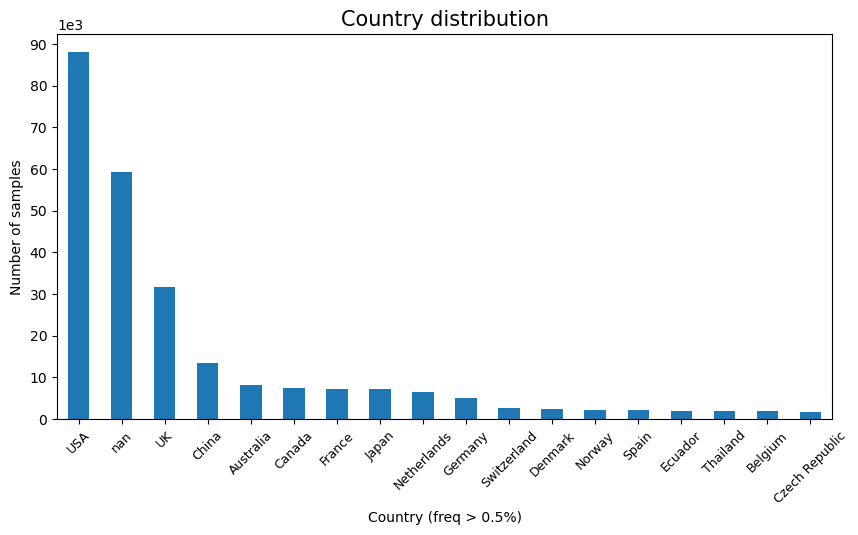

In [11]:
percentage_threshold = 0.005
frequncy_threshold = int(num_samples * percentage_threshold)
country_counts = df_geno['country'].value_counts(dropna=False)
df_country_filtered = country_counts[country_counts > frequncy_threshold]
print(f"Number of unique countries: {df_geno['country'].nunique():,}")
print(f"Number of countries with frequency > {percentage_threshold:.1%}: {df_country_filtered.shape[0]}")
print(f"Share of unknown samples: ({country_counts[np.nan]/num_geno_samples:.2%})")

ax = df_country_filtered.plot(
    kind='bar', figsize=(10, 5), fontsize=10, rot=45
)
# change yticks to scientific notation
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.set_yticks(np.arange(0, 91e3, 10e3))
ax.set_title('Country distribution', fontsize=15)
ax.set_xlabel(f'Country (freq > {percentage_threshold:.1%})', fontsize=10)
plt.xticks(fontsize=9)
ax.set_ylabel('Number of samples', fontsize=10)
if not os.path.exists('results/data/NCBI'):
    os.makedirs('results/data/NCBI')
ax.figure.savefig('results/data/NCBI/country_distr.png', bbox_inches='tight', dpi=300)

**Collection_date**

Group **collection date** into years and change name to 'year' 

Alternative NaN: 'missing'  
Most common format is YYYY-MM-DD  
In cases of YYYY/YYYY, we take the first year

In [12]:
alternative_nan = ['missing']
df_geno.loc[:,'collection_date'] = df_geno['collection_date'].replace(alternative_nan, np.nan)
df_geno.loc[:,'collection_date'] = df_geno['collection_date'].str.split('-').str[0]
df_geno.loc[:,'collection_date'] = df_geno['collection_date'].str.split('/').str[0]
df_geno.rename(columns={'collection_date': 'year'}, inplace=True)

Filter years earlier than XXXX

In [13]:
def filter_years(df, threshold_year):
    print("Dropping samples before threshold_year", threshold_year)
    # get indices of samples before threshold_year, allows us to keep NaN values
    indices = df[df['year'].astype(float) <= threshold_year].index
    num_before = len(indices)
    # drop samples before threshold_year
    df.drop(indices, inplace=True)
    print(f"Number of samples before {threshold_year}: {num_before:,} ({num_before/num_geno_samples:.2%})")
    return df

threshold_year = 1970
print(df_geno.shape[0])
df_geno = filter_years(df_geno, threshold_year)
print(df_geno.shape[0])

280966
Dropping samples before threshold_year 1970
Number of samples before 1970: 255 (0.09%)
280711


### Investigate distributions

Number of unique years: 53
Number of years with frequency > 0.1%: 27
Number of unknown samples 92,339 (32.86%)
Earliest year: 1971
Latest year: 2023


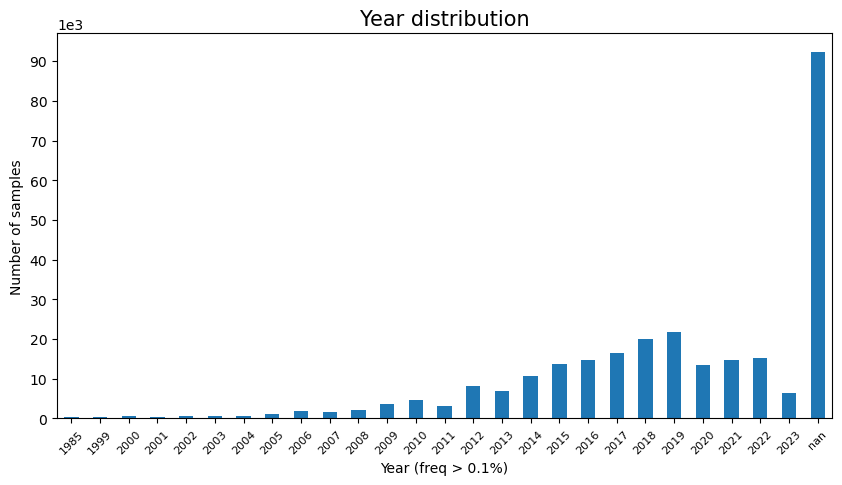

In [14]:
percentage_threshold = 0.001
frequncy_threshold = int(num_samples * percentage_threshold)
year_counts = df_geno['year'].value_counts(dropna=False)
df_year_filtered = year_counts[year_counts > frequncy_threshold]
print(f"Number of unique years: {df_geno['year'].nunique():,}")
print(f"Number of years with frequency > {percentage_threshold:.1%}: {df_year_filtered.shape[0]}")
print(f"Number of unknown samples {year_counts[np.nan]:,} ({year_counts[np.nan]/num_geno_samples:.2%})")

df_geno_notnan = df_geno[df_geno['year'].notnull()].astype({'year': 'int32'})
print(f"Earliest year: {df_geno_notnan['year'].min()}")
print(f"Latest year: {df_geno_notnan['year'].max()}")

ax = df_year_filtered.sort_index().plot(
    kind='bar', figsize=(10, 5), fontsize=10, rot=45
)
# change yticks to scientific notation
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.set_yticks(np.arange(0, 91e3, 10e3))
ax.set_title('Year distribution', fontsize=15)
ax.set_xlabel(f'Year (freq > {percentage_threshold:.1%})', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)
ax.set_ylabel('Number of samples', fontsize=10)
ax.figure.savefig('results/data/NCBI/year_distr.png', bbox_inches='tight', dpi=300)

**AMR_genotypes_core**

In [15]:
# df_geno = df_explore[df_explore['AMR_genotypes_core'].notnull()]
# df_geno = df_geno[dataset_columns]
df_geno.rename(columns={'AMR_genotypes_core': 'genotypes'}, inplace=True)

Begin by making the column into a list of strings

In [16]:
df_geno.loc[:,'genotypes'] = df_geno['genotypes'].str.split(',')
df_geno['genotypes'].head(n=10)

1                      [aadA1, sul1, tet(A)]
4     [aph(3'')-Ib, aph(6)-Id, sul2, tet(A)]
6       [cyaA_S352T=POINT, uhpT_E350Q=POINT]
8                         [parE_D475E=POINT]
9                         [uhpT_E350Q=POINT]
12                 [parC_A56T=POINT, tet(A)]
14                        [parE_I355T=POINT]
16    [aph(3'')-Ib, aph(6)-Id, sul2, tet(B)]
19          [aph(3'')-Ib, aph(6)-Id, tet(B)]
20          [aph(3'')-Ib, aph(6)-Id, tet(B)]
Name: genotypes, dtype: object

In [17]:
# Create column for number of (unique) genotypes
df_geno['num_genotypes'] = df_geno['genotypes'].apply(lambda x: len(set(x)))
df_geno.head() 

,year,country,genotypes,num_genotypes
1,NaN,USA,"[aadA1, sul1, tet(A)]",3
4,NaN,USA,"[aph(3'')-Ib, aph(6)-Id, sul2, tet(A)]",4
6,NaN,Sweden,"[cyaA_S352T=POINT, uhpT_E350Q=POINT]",2
8,NaN,USA,[parE_D475E=POINT],1
9,NaN,USA,[uhpT_E350Q=POINT],1


Filter samples with too many genes

Add column with number of point mutations

In [18]:
df_geno['num_point_mutations'] = df_geno['genotypes'].apply(lambda x: len([i for i in x if '=POINT' in i]))

In [19]:
df_geno.head()

,year,country,genotypes,num_genotypes,num_point_mutations
1,NaN,USA,"[aadA1, sul1, tet(A)]",3,0
4,NaN,USA,"[aph(3'')-Ib, aph(6)-Id, sul2, tet(A)]",4,0
6,NaN,Sweden,"[cyaA_S352T=POINT, uhpT_E350Q=POINT]",2,2
8,NaN,USA,[parE_D475E=POINT],1,1
9,NaN,USA,[uhpT_E350Q=POINT],1,1


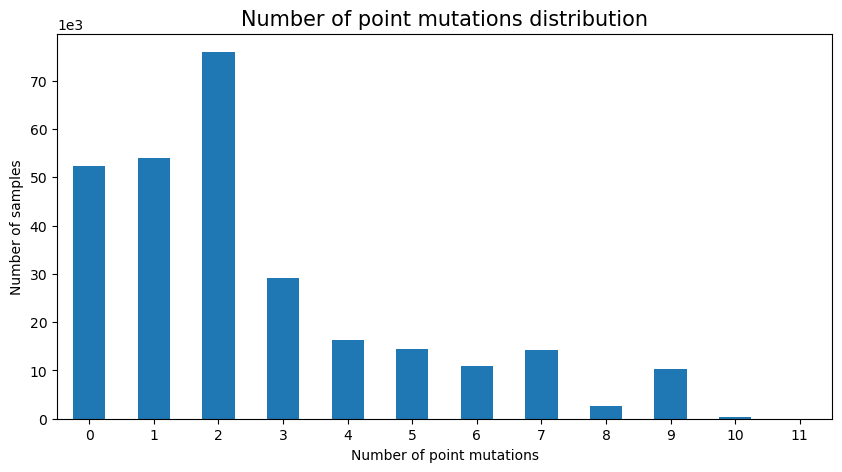

In [20]:
num_pm_counts = df_geno['num_point_mutations'].value_counts().sort_index()
# plot distribution of number of genotypes
ax = num_pm_counts.plot(
    kind='bar', figsize=(10, 5), fontsize=10, rot=0
)
ax.set_title('Number of point mutations distribution', fontsize=15)
ax.set_xlabel('Number of point mutations', fontsize=10)
ax.set_ylabel('Number of samples', fontsize=10)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.figure.savefig('results/data/NCBI/num_pm_distr.png', bbox_inches='tight', dpi=300)

In [21]:
unique_genotypes = set(chain(*df_geno['genotypes']))
print(set([g.split("=")[1] for g in unique_genotypes if '=' in g]))

{'MISTRANSLATION', 'POINT', 'PARTIAL_END_OF_CONTIG', 'PARTIAL', 'HMM'}


In [22]:
num_unique_genes = len(unique_genotypes)
print(f"Number of unique genes: {num_unique_genes:,}")

Number of unique genes: 1,443


Feature to remove variants, e.g. where there are dashes

In [23]:
def remove_genotype_info(df, char: str, view_duplicate_info: bool=False):
    print(f"Splitting genotypes by '{char}', removing it and everything after it")
    old_genotypes = df['genotypes'].copy() # save old genotypes for later
    df['genotypes'] = df['genotypes'].apply(lambda x: list(set([g.split(char)[0] for g in x])))
    
    if view_duplicate_info:
        # count number of samples which now have duplicate genotypes
        num_duplicates = df['genotypes'].apply(lambda x: len(x) - len(set(x))).sum()
        df['num_duplicates'] = df['genotypes'].apply(lambda x: len(x) - len(set(x)))
        print(f"Number of duplicate genotype instances: {num_duplicates:,}")
        print(f"Number of samples with duplicate genotypes: {df[df['num_duplicates'] > 0].shape[0]:,}")
        print(f"Maximum number of duplicates in a sample: {df['num_duplicates'].max()}")
        index_max_duplicates = df['num_duplicates'].idxmax()
        print("Genes in sample with the most duplicates:")
        print(*old_genotypes[index_max_duplicates], sep="\n") # uncomment to see the genotypes with the most duplicates
        # remove duplicates
        df['genotypes'] = df['genotypes'].apply(lambda x: list(set(x)))
        df.drop(columns=['num_duplicates'], inplace=True)
    
    return df

In [24]:
print(f"Number of unique genes: {len(set(chain(*df_geno['genotypes']))):,}")
remove_extra_genotype_info = True
if remove_extra_genotype_info:
    df_geno = remove_genotype_info(df_geno, '-', view_duplicate_info=True)
    print(f"Number of unique genes without extra info: {len(set(chain(*df_geno['genotypes']))):,}")

Number of unique genes: 1,443
Splitting genotypes by '-', removing it and everything after it
Number of duplicate genotype instances: 0
Number of samples with duplicate genotypes: 0
Maximum number of duplicates in a sample: 0
Genes in sample with the most duplicates:
aadA1
sul1
tet(A)
Number of unique genes without extra info: 887


Feature to remove assembly variations, e.g. partials, mistranslation variants and HMM 

In [25]:
exclude_assembly_variants = ['=PARTIAL', '=MISTRANSLATION', '=HMM']
print(f"Removing genotypes with assembly variants: {exclude_assembly_variants}")
df_geno['genotypes'] = df_geno['genotypes'].apply(lambda x: [g for g in x if not g.endswith(tuple(exclude_assembly_variants))]) 
df_geno = df_geno[df_geno['genotypes'].apply(lambda x: len(x) > 0)] # Remove any rows where genotypes are empty
print(f"Number of unique genes without assembly variants: {len(set(chain(*df_geno['genotypes']))):,}")

Removing genotypes with assembly variants: ['=PARTIAL', '=MISTRANSLATION', '=HMM']
Number of unique genes without assembly variants: 697


Feature to remove redundancies where there is, for example, **genotype** *and* **genotype=PARTIAL_END_OF_CONTIG**,  
but keep **genotype=PARTIAL_END_OF_CONTIG** when **genotype** is not present

In [26]:
print(df_geno.loc[7271, 'genotypes'])
print(df_geno.loc[37, 'genotypes'])
print(f"Maximum number of genotypes in a sample: {df_geno['num_genotypes'].max()}")

['mph(A)', 'tet(A)', 'blaOXA=PARTIAL_END_OF_CONTIG', 'blaCTX', 'parE_L416F=POINT', "aac(6')", 'sul1', 'blaTEM', 'aph(6)', 'gyrA_D87N=POINT', "aph(3'')", 'dfrA17', 'parC_S80I=POINT', 'sul2', 'blaOXA', 'dfrA14', 'catB3=PARTIAL_END_OF_CONTIG', 'tet(B)', 'aadA5', 'gyrA_S83L=POINT']
['cyaA_S352T=POINT', 'blaCMY=PARTIAL_END_OF_CONTIG', 'tet(B)', 'sul2']
Maximum number of genotypes in a sample: 48


In [27]:
assembly_chars = ['=PARTIAL', '=MISTRANSLATION', '=HMM', '=PARTIAL_END_OF_CONTIG']
df_geno['genotypes'] = df_geno['genotypes'].apply(lambda x: list(set(x) - set([g for g in x if g.endswith(tuple(assembly_chars)) and g.split("=")[0] in x])))

In [28]:
print(df_geno.loc[7271, 'genotypes'])
print(df_geno.loc[37, 'genotypes'])
print(f"Maximum number of genotypes in a sample: {df_geno['num_genotypes'].max()}")

['mph(A)', 'tet(A)', "aph(3'')", 'dfrA17', 'parC_S80I=POINT', 'sul2', 'blaOXA', 'blaCTX', 'dfrA14', 'parE_L416F=POINT', 'catB3=PARTIAL_END_OF_CONTIG', 'aadA5', "aac(6')", 'sul1', 'blaTEM', 'tet(B)', 'aph(6)', 'gyrA_S83L=POINT', 'gyrA_D87N=POINT']
['cyaA_S352T=POINT', 'blaCMY=PARTIAL_END_OF_CONTIG', 'tet(B)', 'sul2']
Maximum number of genotypes in a sample: 48


Check for cases where info is too limited

In [29]:
print(f"Number of samples with only one genotype: {df_geno[df_geno['num_genotypes'] == 1].shape[0]:,}")
print(f"Number of samples with one genotype and max one of (country, year): {df_geno[(df_geno['num_genotypes'] == 1) & ((df_geno['country'].isnull()) | (df_geno['year'].isnull()))].shape[0]:,}")
print(f"Number of samples with one genotype and no other info (country, year): {df_geno[(df_geno['num_genotypes'] == 1) & (df_geno['country'].isnull()) & (df_geno['year'].isnull())].shape[0]:,}")

Number of samples with only one genotype: 26,554
Number of samples with one genotype and max one of (country, year): 10,764
Number of samples with one genotype and no other info (country, year): 4,143


Exclude cases where there is *only* one genotype and **no other info**

In [30]:
indices = df_geno[(df_geno['num_genotypes'] == 1) & (df_geno['country'].isnull()) & (df_geno['year'].isnull())].index
print(f"Number of samples with one genotype and no other info (country, year): {len(indices):,}")
df_geno.drop(indices, inplace=True)

Number of samples with one genotype and no other info (country, year): 4,143


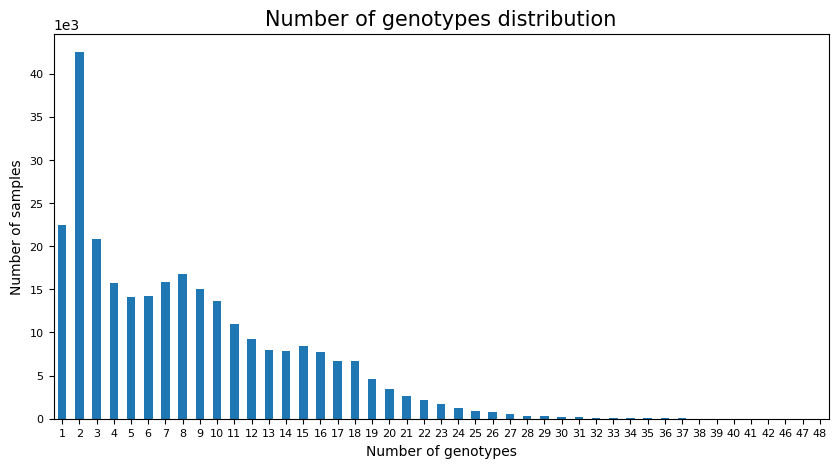

In [31]:
num_gene_counts = df_geno['num_genotypes'].value_counts().sort_index()
# plot distribution of number of genotypes
ax = num_gene_counts.plot(
    kind='bar', figsize=(10, 5), fontsize=8, rot=0
)
ax.set_title('Number of genotypes distribution', fontsize=15)
ax.set_xlabel('Number of genotypes', fontsize=10)
ax.set_ylabel('Number of samples', fontsize=10)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.figure.savefig('results/data/NCBI/num_genotypes_distr.png', bbox_inches='tight', dpi=300)

In [32]:
def filter_gene_counts(df, threshold_num):
    print(f"Dropping samples with more than {threshold_num} genotypes")
    # get indices of samples with more than threshold_num genotypes
    indices = df[df['num_genotypes'] > threshold_num].index
    num_above = len(indices)
    # drop samples with more than threshold_num genotypes
    df.drop(indices, inplace=True)
    print(f"Number of samples with more than {threshold_num} genotypes: {num_above:,}")
    return df

# df_geno = filter_gene_counts(df_geno, 40)

In [33]:
df_geno[df_geno['num_genotypes'] == 48]['genotypes'].head()

223665    [mph(A), catA1, tet(A), blaCTX, parE_L416F=POINT, aadA1=PARTIAL_END_OF_CONTIG, aac(6'), sul1, blaTEM, aph(3'), aph(6), tet(M), aac(3), gyrA_D87N=POINT, floR, qnrB, qnrB4, mcr, aph(3''), dfrA17, blaDHA, parC_S80I=POINT, blaOXA, sul2, dfrA14, sul3, catB3=PARTIAL_END_OF_CONTIG, aadA5, ble, gyrA_S83L=POINT, glpT_E448K=POINT, qnrB1, blaNDM]
Name: genotypes, dtype: object

Final dataset

In [34]:
print(f"Final number of samples: {df_geno.shape[0]:,}")
df_geno.head(n=30)

Final number of samples: 276,445


,year,country,genotypes,num_genotypes,num_point_mutations
1,NaN,USA,"[sul1, aadA1, tet(A)]",3,0
4,NaN,USA,"[sul2, aph(6), tet(A), aph(3'')]",4,0
6,NaN,Sweden,"[cyaA_S352T=POINT, uhpT_E350Q=POINT]",2,2
8,NaN,USA,[parE_D475E=POINT],1,1
9,NaN,USA,[uhpT_E350Q=POINT],1,1
12,NaN,USA,"[parC_A56T=POINT, tet(A)]",2,1
14,NaN,Sweden,[parE_I355T=POINT],1,1
16,NaN,Indonesia,"[sul2, aph(6), tet(B), aph(3'')]",4,0
19,NaN,USA,"[aph(6), tet(B), aph(3'')]",3,0
20,NaN,Canada,"[aph(6), tet(B), aph(3'')]",3,0


Write processed genotype data to .csv

In [35]:
# path = 'data/NCBI_genotype_parsed.pkl'
# df_geno.to_pickle(path)

Count gene occurences

In [36]:
# get all unique genotypes
unique_genotypes = set(chain(*df_geno['genotypes']))
print(f"Number of unique genotypes: {len(unique_genotypes):,}")
counter = Counter(chain(*df_geno['genotypes']))
print(counter.most_common(10))
frequncy_threshold = 5
print(f"Number of genotypes with frequency > {frequncy_threshold}: {len([i for i in counter.values() if i > frequncy_threshold]):,}")

Number of unique genotypes: 685
[('glpT_E448K=POINT', 163056), ('sul2', 111195), ('aph(6)', 106303), ("aph(3'')", 105828), ('blaTEM', 96206), ('tet(A)', 96016), ('gyrA_S83L=POINT', 92342), ('sul1', 71308), ('blaCTX', 70114), ('parC_S80I=POINT', 66982)]
Number of genotypes with frequency > 5: 399
